# Обработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [4]:
df.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [5]:
df.drop('id', axis=1, inplace=True)
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')

In [6]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [7]:
df.rainfall.value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

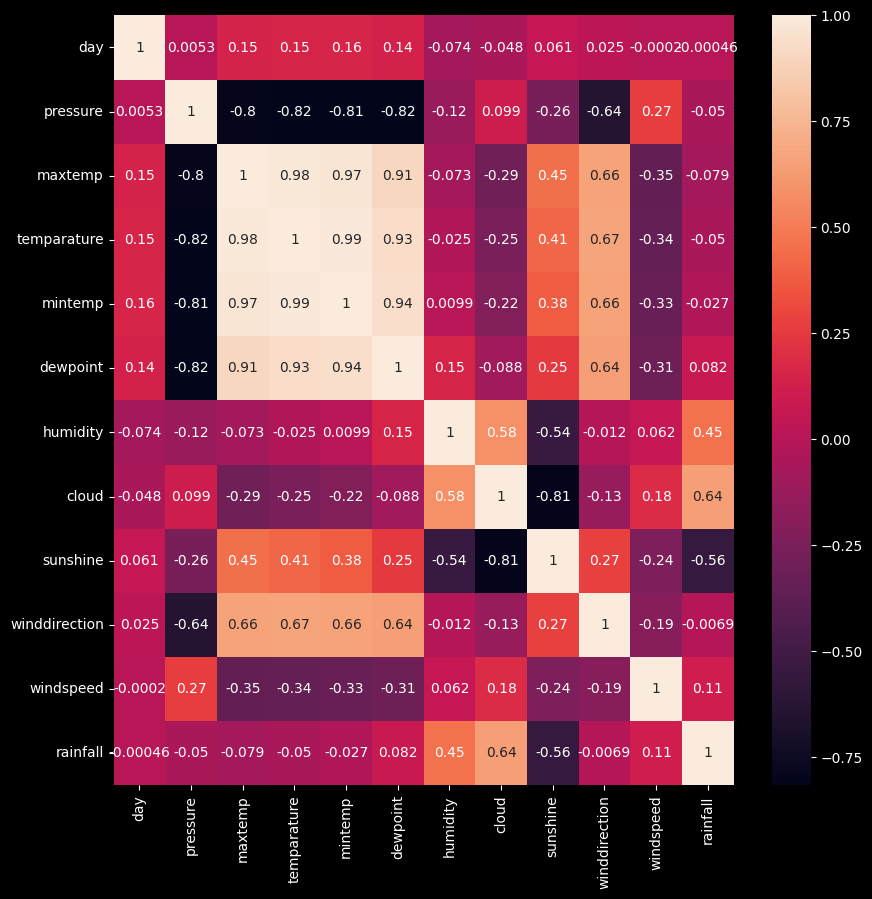

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
df['day_cos'] = np.cos(df['day'] * 2 * np.pi / 365)
df['day_sin'] = np.sin(df['day'] * 2 * np.pi / 365)

df['winddirection_cos'] = np.cos(df['winddirection'] * 2 * np.pi / 365)
df['winddirection_sin'] = np.sin(df['winddirection'] * 2 * np.pi / 365)

In [10]:
for col in [
    'maxtemp', 'mintemp', 'day', 'winddirection'
]:
    df.drop(col, axis=1, inplace=True)

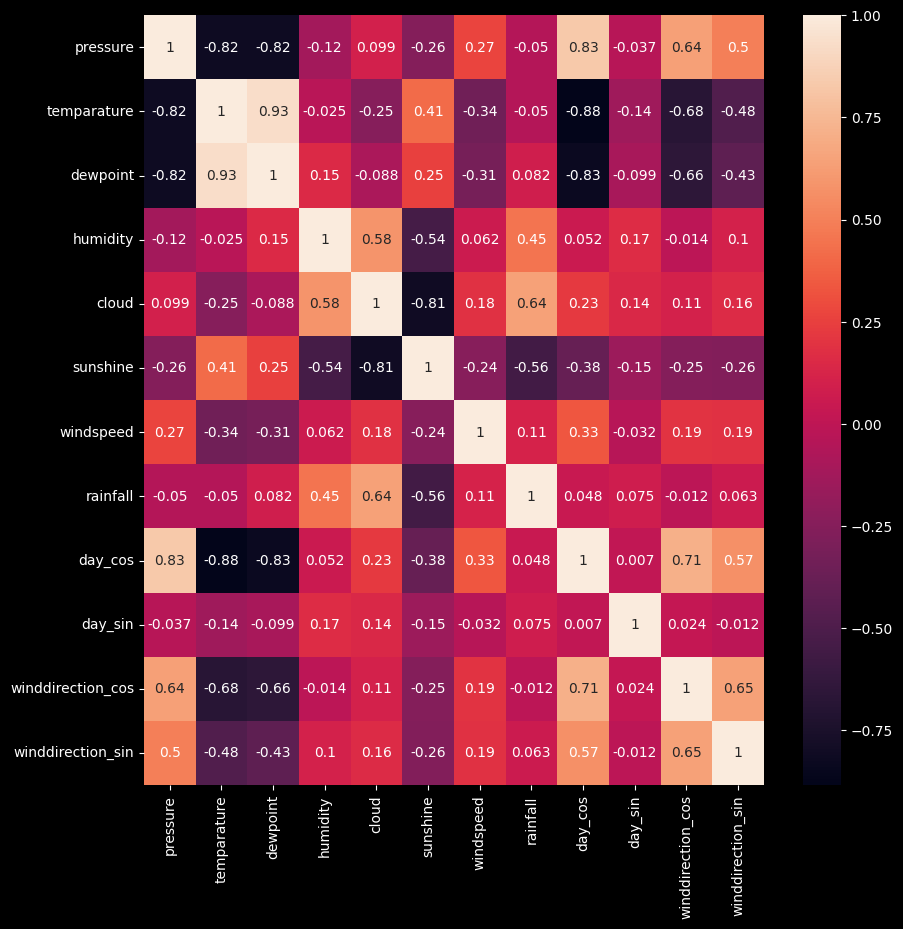

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(df)
df = pd.DataFrame(scaled_features, columns=df.columns)

In [13]:
from sklearn.model_selection import train_test_split

x = df.drop('rainfall', axis=1)  
y = df['rainfall']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1752, 11), (438, 11), (1752,), (438,))

In [ ]:
# Борьба с дисбалансом классов
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Обучение модели

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

## FFNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

In [ ]:
model = Sequential([
    layers.Input(shape=(11, )),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision'])

In [ ]:
x_train_balanced.shape

(2662, 11)

In [ ]:
history = model.fit(x_train_balanced, y_train_balanced, batch_size=32, epochs=10)

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7619 - loss: 0.5241 - precision: 0.7614
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8334 - loss: 0.4023 - precision: 0.8190
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8289 - loss: 0.4069 - precision: 0.8050
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8112 - loss: 0.4137 - precision: 0.7960
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8262 - loss: 0.3924 - precision: 0.8239
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8218 - loss: 0.3822 - precision: 0.8099
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8301 - loss: 0.3801 - precision: 0.8285
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8294 - loss: 0.3728 - precision: 0.8256
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8287 - loss: 0.3831 - precision: 0.8250
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
y_pred_prob = model.predict(x_test)

max_f1, best_threshold = 0, 0

for threshold in np.arange(0.1, 1.0, 0.1):
    threshold = 0.5
    y_pred = (y_pred_prob > threshold).astype("int32")

    f1 = f1_score(y_test, y_pred)

    if max_f1 < f1:
        best_threshold = threshold
        max_f1 = f1

print(f'Best threshold = {best_threshold}')
print(f'Best f1 score = {max_f1}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Best threshold = 0.5
Best f1 score = 0.8515497553017944


In [ ]:
y_pred = (y_pred_prob > best_threshold).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'accuracy = {accuracy:.4f}    precision = {precision:.4f}')

accuracy = 0.7922    precision = 0.8878


## RNN 

In [ ]:
def create_dataset1(data, target, time_steps=7, output_steps=7):
    X, y = [], []
    for i in range(len(data) - time_steps - output_steps + 1):
        X.append(data[i:(i + time_steps)])
        y.append(target[i + time_steps:i + time_steps + output_steps])
    return np.array(X), np.array(y)

In [ ]:
x, y = create_dataset1(df.drop(['rainfall'], axis=1).values, df['rainfall'].values)
x_train_rnn, x_test_rnn, y_train_rnn, y_test_rnn = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_rnn.shape, x_test_rnn.shape, y_train_rnn.shape, y_test_rnn.shape

((1741, 7, 12), (436, 7, 12), (1741, 7), (436, 7))

In [ ]:
model = Sequential([
    layers.LSTM(50, return_sequences=True, input_shape=(x_train_rnn.shape[1], x_train_rnn.shape[2])),
    layers.LSTM(50, return_sequences=False),
    layers.Dense(25),
    layers.Dense(7, activation='sigmoid')
])

model.compile(optimizer='adam', loss='weighted_crossentropy', metrics=['accuracy', 'precision'])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
pd.DataFrame(y_train_rnn).value_counts()

0    1    2    3    4    5    6  
1.0  1.0  1.0  1.0  1.0  1.0  1.0    390
                              0.0     83
0.0  1.0  1.0  1.0  1.0  1.0  1.0     74
1.0  1.0  1.0  0.0  1.0  1.0  1.0     73
               1.0  1.0  0.0  1.0     72
                                    ... 
0.0  0.0  1.0  1.0  1.0  1.0  0.0      1
               0.0  1.0  0.0  0.0      1
1.0  0.0  1.0  0.0  1.0  0.0  0.0      1
          0.0  0.0  1.0  0.0  0.0      1
               1.0  0.0  0.0  0.0      1
Name: count, Length: 126, dtype: int64

In [ ]:
model.fit(x_train_rnn, y_train_rnn, batch_size=32, epochs=10)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3425 - loss: 0.6174 - precision: 0.7587
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1713 - loss: 0.5562 - precision: 0.7501
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0622 - loss: 0.5413 - precision: 0.7611
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5039 - loss: 0.5486 - precision: 0.7513
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1266 - loss: 0.5399 - precision: 0.7553
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2530 - loss: 0.5422 - precision: 0.7521
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3455 - loss: 0.5347 - precision: 0.7577
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1690 - loss: 0.5381 - precision: 0.7543
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3688 - loss: 0.5373 - precision: 0.7542
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0

In [ ]:
y_pred_prob = model.predict(x_test_rnn)

max_f1, best_threshold = 0, 0

for threshold in np.arange(0.1, 1.0, 0.1):
    threshold = 0.5
    y_pred = (y_pred_prob > threshold).astype("int32")

    f1 = f1_score(y_test_rnn, y_pred, average='weighted')

    if max_f1 < f1:
        best_threshold = threshold
        max_f1 = f1

print(f'Best threshold = {best_threshold}')
print(f'Best f1 score = {max_f1}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Best threshold = 0.5
Best f1 score = 0.8578931608742115


In [ ]:
y_pred = (y_pred_prob > best_threshold).astype("int32")

accuracy = accuracy_score(y_test_rnn, y_pred)
precision = precision_score(y_test_rnn, y_pred, average='weighted')

print(f'accuracy = {accuracy:.4f}    precision = {precision:.4f}')

accuracy = 0.2477    precision = 0.7513


## RNN 2

In [ ]:
def create_dataset2(data, target, time_steps=7, output_steps=7):
    X, y = [], []
    for i in range(len(data) - time_steps - output_steps + 1):
        X.append(data[i:(i + time_steps)])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

In [ ]:
x, y = create_dataset2(df.values, df['rainfall'].values)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1741, 7, 12), (436, 7, 12), (1741,), (436,))

In [ ]:
model = Sequential([
    layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    layers.LSTM(50, return_sequences=False),
    layers.Dense(25),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision'])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7662 - loss: 0.5632 - precision: 0.7662
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7717 - loss: 0.5326 - precision: 0.7717
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7739 - loss: 0.5202 - precision: 0.7739
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7489 - loss: 0.5486 - precision: 0.7489
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7361 - loss: 0.5570 - precision: 0.7379
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7466 - loss: 0.5372 - precision: 0.7472
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7376 - loss: 0.5517 - precision: 0.7376
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7710 - loss: 0.5182 - precision: 0.7711
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7597 - loss: 0.5300 - precision: 0.7599
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0

In [ ]:
y_pred_prob = model.predict(x_test)

max_f1, best_threshold = 0, 0

for threshold in np.arange(0.1, 1.0, 0.1):
    threshold = 0.5
    y_pred = (y_pred_prob > threshold).astype("int32")

    f1 = f1_score(y_test, y_pred)

    if max_f1 < f1:
        best_threshold = threshold
        max_f1 = f1

print(f'Best threshold = {best_threshold}')
print(f'Best f1 score = {max_f1}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Best threshold = 0.5
Best f1 score = 0.8511198945981555


In [ ]:
y_pred = (y_pred_prob > best_threshold).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'accuracy = {accuracy:.4f}    precision = {precision:.4f}')

accuracy = 0.7408    precision = 0.7408
